# Лабораторная работа 4

## Деревья решений

## Выполнил: 6131, Соколов Роман Александрович

In [72]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

## Выберите набор данных для классификации (бинарной или многоклассовой — не важно). Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [135]:
df = pd.read_csv('gran_turismo_gt6.csv')
df = df.dropna()
df

,brand,model,car_type,img_url,price,drive,hp,weight,torque,w_kg
0,AC Cars,427 S/C '66,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,423200.0,FR,478.0,1311.0,651.0,272 to ? W/Kg
1,AEM,S2000,Tuned,https://www.kudosprime.com/gt6/images/cars/gt6...,100000.0,FR,430.0,1155.0,495.0,278 to 345 W/Kg
3,Abarth,500 '09,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,29500.0,FF,133.0,1035.0,180.0,96 to 251 W/Kg
4,Abarth,Grande Punto '09,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,27000.0,FF,153.0,1240.0,230.0,92 to ? W/Kg
5,Acura,CL 3.2 Type-S '01,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,32180.0,FF,260.0,1592.0,315.0,122 to ? W/Kg
...,...,...,...,...,...,...,...,...,...,...
1265,Volkswagen,Scirocco R '10,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,51500.0,FF,252.0,1410.0,330.0,133 to 298 W/Kg
1266,Volkswagen,W12 Nardo '01,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,1250000.0,MR,574.0,1300.0,620.0,329 to ? W/Kg
1267,Volvo,240 GLT Estate '88,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,15920.0,FR,127.0,1890.0,190.0,50 to ? W/Kg
1268,Volvo,C30 R-Design '09,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,42000.0,FF,227.0,1430.0,319.0,118 to ? W/Kg


# Задание 1

## 1.0. Для вашего датасета преобразовать категориальные признаки в бинарные с помощью pd.factorize / pd.get_dummies

In [136]:
y = pd.get_dummies(df['car_type'])

In [138]:
y

,Race,Street,Tuned
0,0,1,0
1,0,0,1
3,0,1,0
4,0,1,0
5,0,1,0
...,...,...,...
1265,0,1,0
1266,0,1,0
1267,0,1,0
1268,0,1,0


## 1.1. С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализованного датасета KNeighborsClassifier (без использования конвееров) 

In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
scaler = StandardScaler()

In [142]:
data = df.iloc[0:,[-4, -3, -2]]
data.head(2)

,hp,weight,torque
0,478.0,1311.0,651.0
1,430.0,1155.0,495.0


In [143]:
data1 = scaler.fit_transform(data)
data = pd.DataFrame({'hp':data1[0:,0], 'weight':data1[0:, 1], 'torque':data1[0:, 2]})

In [144]:
x_train, y_train = data[0:round(data.shape[0]*0.3)], y[0:round(y.shape[0]*0.3)]
x_test, y_test = data[round(data.shape[0]*0.3):], y[round(y.shape[0]*0.3):]

In [145]:
from sklearn.neighbors import KNeighborsClassifier

In [146]:
model1 = KNeighborsClassifier(n_neighbors=3)

In [147]:
model1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [148]:
pred = model1.predict(x_test)

In [149]:
result = pd.DataFrame(pred)
result

,0,1,2
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
717,0,1,0
718,1,0,0
719,0,1,0
720,0,1,0


## 1.2. То же самое и использованием sklearn.pipeline.Pipeline 

In [150]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [151]:
pipe = Pipeline([('scaler', StandardScaler()), ('k_neib', KNeighborsClassifier())])

In [152]:
y = pd.factorize(df['car_type'])
type(y[0])

numpy.ndarray

In [153]:
y2 = pd.DataFrame(y[0])
y2

,0
0,0
1,1
2,0
3,0
4,0
...,...
1026,0
1027,0
1028,0
1029,0


In [154]:
y2_train = y2[0:round(y2.shape[0]*0.3)]
y2_test = y2[round(y2.shape[0]*0.3):]

In [155]:
pipe.fit(x_train, np.ravel(y2_train))

Pipeline(steps=[('scaler', StandardScaler()),
                ('k_neib', KNeighborsClassifier())])

In [156]:
pipe.score(x_test, np.ravel(y2_test))

0.9058171745152355

In [157]:
pipe.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## 1.3. С помощью GridSearchCV произвести подбор гиперпараметра KNeighborsClassifier (n_neighbors) и выведите значение гиперпараметра и метрику для наилучшей модели 

In [158]:
from sklearn.model_selection import GridSearchCV

In [165]:
model3 = KNeighborsClassifier(n_neighbors=3, leaf_size=2)

In [160]:
parameters = {'weights': ('distance', 'uniform'), 'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'), 'leaf_size': [i for i in range(2, 30)]}

In [161]:
clf = GridSearchCV(model3, parameters)
clf

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'leaf_size': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29],
                         'weights': ('distance', 'uniform')})

In [162]:
clf = clf.fit(x_train, y_train)

In [163]:
clf.best_estimator_

KNeighborsClassifier(leaf_size=2, n_neighbors=3)

In [166]:
model3.fit(x_train, y_train)
accuracy_score(y_test, model3.predict(x_test))

0.8919667590027701

# Задание 2

## 2.1. Продемонстрировать работу DecisionTreeClassifier, посчитать метрики качества на отложенной выборке

In [167]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [175]:
dtc = DecisionTreeClassifier(max_depth=4, max_features=2, min_samples_leaf=8,
                       min_samples_split=16)

In [176]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=2, min_samples_leaf=8,
                       min_samples_split=16)

In [170]:
cross_val_score(dtc, x_train, y_train)

array([0.88709677, 0.85483871, 0.91935484, 0.85483871, 0.95081967])

## 2.2. С помощью GridSearchCV произвести подбор гиперпараметров для поиска наилучшего дерева (перебрать max_depth, max_features и может быть что-то ещё) 

In [171]:
tree_par = {'criterion': ['gini', 'entropy'], 'splitter':['best', 'random'], 'min_samples_leaf':[i for i in range(10)], 'min_samples_split':[i for i in range(10, 20)], 'max_depth':[i for i in range(10)], 'max_features':[i for i in range(10)]}

In [172]:
cl_tree = GridSearchCV(dtc, tree_par)

In [173]:
cl_tree.fit(x_train, y_train)

d:\python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
151400 fits failed out of a total of 200000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20000 fits failed with the following error:
Traceback (most recent call last):
  File "d:\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python39\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "d:\python39\lib\site-packages\sklearn\tree\_classes.py", line 235, in fit
    raise ValueError(
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

---------------------------------------------------

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [10, 11, 12, 13, 14, 15, 16, 17,
                                               18, 19],
                         'splitter': ['best', 'random']})

In [174]:
cl_tree.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=2, min_samples_leaf=8,
                       min_samples_split=16)

In [177]:
accuracy_score(y_test, dtc.predict(x_test))

0.8795013850415513

## 2.3. Для полученного наилучшего дерева построить график feature_importances и дополнительно напечатать 3 наиболее важных признака, отсортировав их по убыванию важности 

In [178]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

In [179]:
forest = RandomForestClassifier(random_state=0)
forest.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [180]:
fore = forest.feature_importances_

In [181]:
x_train.columns[0]

'hp'

In [182]:
fore = sorted(fore, reverse=True)
fore = np.array(fore)

In [183]:
shp = np.array(fore.shape[0])

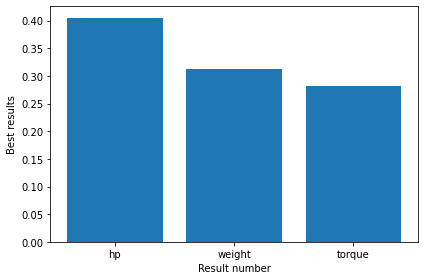

In [184]:
plt.bar(x_train.columns, fore)
plt.xlabel('Result number')
plt.ylabel('Best results')
plt.tight_layout()

# Задание 3

## 3.1. Продемонстрировать работу случайного леса RandomForestClassifier

In [185]:
from sklearn.ensemble import RandomForestClassifier

In [186]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=8, max_features=1,
                       min_samples_leaf=4, min_samples_split=18)
rfc.fit(x_train, y_train)
rfc.predict(x_test)

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=uint8)

## 3.2. С помощью GridSearchCV произвести подбор гиперпараметров для поиск наилучшего леса, посмотреть насколько улучшились метрики 

In [187]:
rfc_par = {'criterion': ['gini', 'entropy'], 'n_estimators':[i for i in range(100, 110)], 'min_samples_split':[i for i in range(5)], 'max_depth':[i for i in range(3)], 'max_features':[i for i in range(5)]}

In [188]:
rfc_tree = GridSearchCV(rfc, rfc_par)

In [189]:
rfc_tree.fit(x_train, y_train)

d:\python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5700 fits failed out of a total of 7500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1500 fits failed with the following error:
Traceback (most recent call last):
  File "d:\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "d:\python39\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "d:\python39\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self

GridSearchCV(estimator=RandomForestClassifier(criterion='entropy', max_depth=8,
                                              max_features=1,
                                              min_samples_leaf=4,
                                              min_samples_split=18),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 1, 2],
                         'max_features': [0, 1, 2, 3, 4],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [100, 101, 102, 103, 104, 105, 106,
                                          107, 108, 109]})

In [190]:
cl_tree.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=2, min_samples_leaf=8,
                       min_samples_split=16)

In [192]:
accuracy_score(y_test, rfc.predict(x_test))

0.9016620498614959

## Самой результативной моделью с подобранными параметрами оказалась модель KNeighborsClassifier() с использованием Pipeline